In [11]:
import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image

import mbuild as mb
from mbuild.lib.recipes import Polymer as mbPolymer

# Polyvinylidene Fluoride (PVDF)

https://en.wikipedia.org/wiki/Polyvinylidene_fluoride

>It is available in the form of piping products, sheet, tubing, films, plate and an insulator for premium wire. It can be injected, molded or welded and is commonly used in the chemical, semiconductor, medical and defense industries

In [12]:
Image("pvdf.png")

FileNotFoundError: No such file or directory: 'pvdf.png'

FileNotFoundError: No such file or directory: 'pvdf.png'

<IPython.core.display.Image object>

# Using mBuild:

In [3]:
smiles = "C-C(F)F"
pvdf = mb.load(smiles, smiles=True)
pvdf.visualize(backend="py3Dmol")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
poly_pvdf = mbPolymer()
poly_pvdf.add_monomer(compound=pvdf, indices=[4, -1], replace=True, separation=0.16)
poly_pvdf.build(n=5)
poly_pvdf.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Back in FlowerMD:

In [5]:
from flowermd.base import Polymer

class PVDF(Polymer):
    """Polyvinylidene Fluoride"""
    def __init__(self, lengths, num_mols):
        smiles = "C-C(F)F"
        bond_indices = [4, -1]
        bond_length = 0.16
        bond_orientation = [None, None]
        super(PVDF, self).__init__(
            lengths=lengths,
            num_mols=num_mols,
            smiles=smiles,
            bond_indices=bond_indices,
            bond_length=bond_length,
            bond_orientation=bond_orientation
        )

In [15]:
pvdf = PVDF(num_mols=[10, 10], lengths=[20, 5])
pvdf.molecules[-1].visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
from flowermd.library.polymers import PVDF
from flowermd.library.forcefields import GAFF
from flowermd.base import Pack
from flowermd.utils import get_target_box_mass_density

In [9]:
pvdf = PVDF(num_mols=[10, 10], lengths=[20, 10])
system = Pack(molecules=pvdf, density=1.5)
system.apply_forcefield(force_field=GAFF(), r_cut=2.5, auto_scale=True)

No charged group detected, skipping electrostatics.


In [10]:
from flowermd.modules.welding import SlabSimulation

In [11]:
slab_sim = SlabSimulation.from_system(system=system, interface_axis=(1, 0, 0))

target_box = get_target_box_mass_density(
    mass=system.mass.to("g"),
    density=system.density
)

slab_sim.run_update_volume(
    n_steps=2e4,
    final_box_lengths=target_box,
    kT=6.0,
    tau_kt=100*slab_sim.dt,
    period=100
)

slab_sim.run_NVT(n_steps=2e4, tau_kt=100*slab_sim.dt, kT=4.0)

slab_sim.flush_writers()

*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0
*Warning*: dihedral.harmonic: specified K <= 0


Initializing simulation state from a gsd.hoomd.Frame.
Step 5500 of 20000; TPS: 508.96; ETA: 0.5 minutes
Step 11000 of 20000; TPS: 492.34; ETA: 0.3 minutes
Step 16500 of 20000; TPS: 466.19; ETA: 0.1 minutes


In [12]:
slab_sim.run_NVT(n_steps=2e4, tau_kt=100*slab_sim.dt, kT=4.0)

Step 1899 of 20000; TPS: 178.26; ETA: 1.7 minutes
Step 7399 of 20000; TPS: 176.88; ETA: 1.2 minutes
Step 12899 of 20000; TPS: 176.2; ETA: 0.7 minutes
Step 18399 of 20000; TPS: 179.67; ETA: 0.1 minutes


In [13]:
slab_sim.flush_writers()

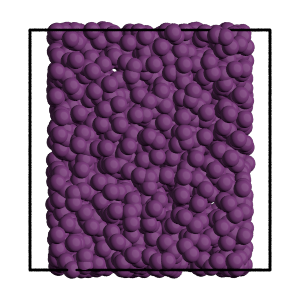

In [34]:
from cmeutils.visualize import FresnelGSD

view = FresnelGSD("trajectory.gsd")
view.frame = -1
view.view_axis = (0, 1, 0)
view.view()

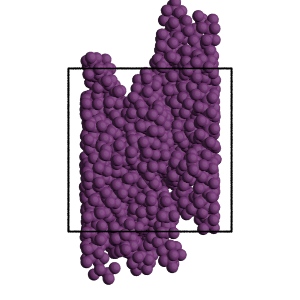

In [35]:
view.unwrap_positions = True
view.height = 15
view.view()

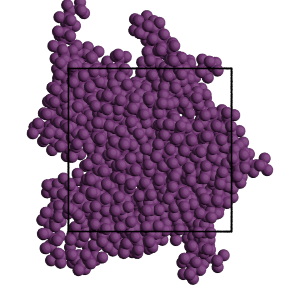

In [36]:
view.view_axis = (1, 0 , 0)
view.view()

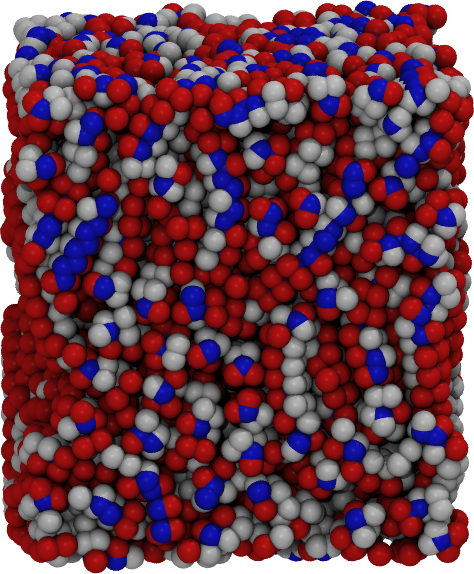

In [6]:
Image("pvdf-slab.png")

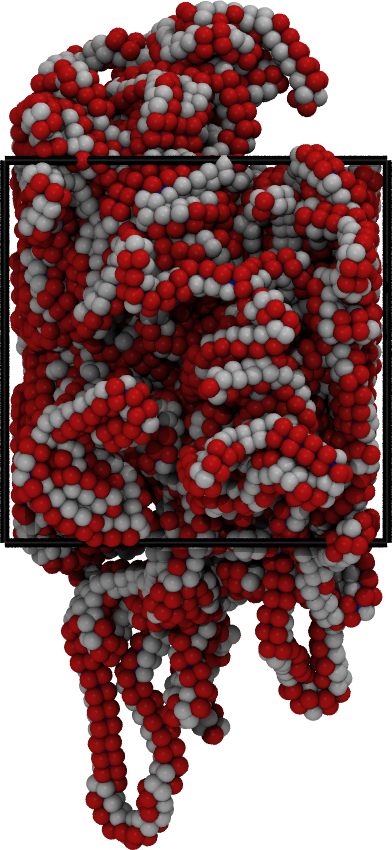

In [7]:
Image("pvdf-slab1.png")

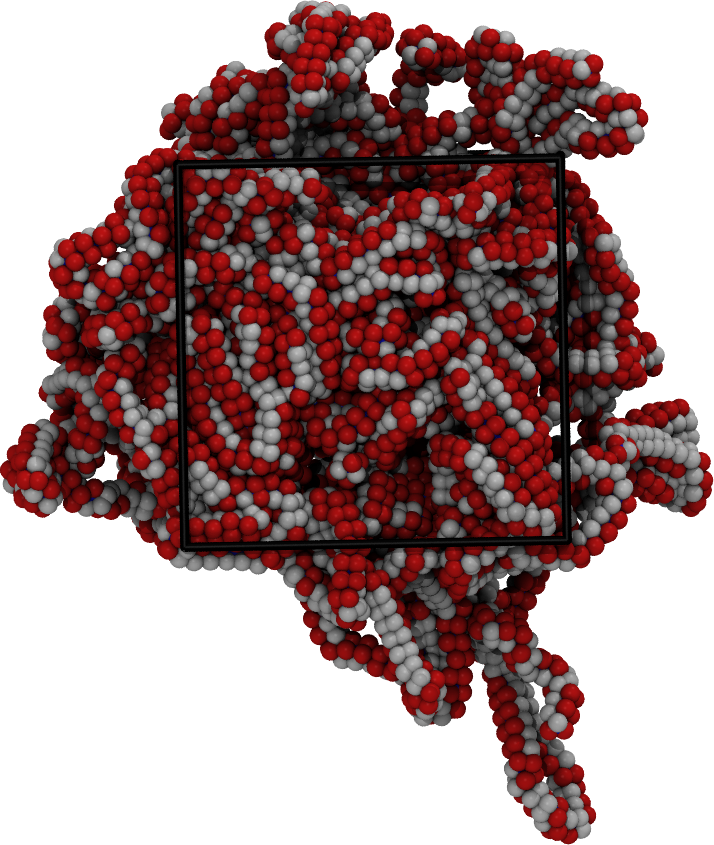

In [8]:
Image("pvdf-slab2.png")

In [13]:
import pickle
from flowermd.modules.welding import Interface, WeldSimulation

In [18]:
interface = Interface(
    gsd_files=["trajectory.gsd"],
    gap=0.1,
    interface_axis=(1, 0, 0),
    remove_void_particles=False
)

ValueError: cannot reshape array of size 5800 into shape (1450,)

# Summary

In [ ]:
pvdf = PVDF(num_mols=[10, 10], lengths=[20, 10])
system = Pack(molecules=pvdf, density=1.5)
system.apply_forcefield(force_field=GAFF(), r_cut=2.5, auto_scale=True)